# Heart Disease Diagnosis in Cleveland

## Introduction

This Heart Disease dataset contains data for heart diseases of 303 patients from Cleveland. There are 13 attributes recorded for every patient that may or may not be linked to the type of heart disease they have. 

This project will attempt to predict the heart disease diagnosis of a new patient based on medical information about them to a high degree of accuracy using classification and K nearest neighbor. The prediction will determine to what degree the patient has heart disease, from 0 (no heart disease) to 4. 

This dataset contains common variables that lead to heart diseases and the associated heart disease diagnosis for 303 patients from Cleveland. Without knowing the diagnosis, it is expected that other relevant patient information held in this dataset can be used to accurately predict the diagnosis. For example, higher cholesterol is known to lead to heart attacks or other severe heart disorders. The information on which we will base our analysis includes the patient’s age, resting blood pressure, cholesterol, and maximum heart rate recorded. 

We expect to find a positive relationship between the predictors and the severity of heart disease, and therefore, data containing patient information for the predictors should be indicative of the diagnosis and could be used to statistically determine the diagnosis. With this information, when displayed correctly, we could assess an individual’s health records and predict whether or not the individual will be afflicted with a heart condition and judge its severity. These findings could lead to asking greater questions on applying this technique to anticipate other medical conditions. 

Below is the start of our wrangling and analysis of the dataset, as well as 6 graphs depicting how we will use the various predictors in our dataset to make a prediction of the diagnosis for a new patient. 

## Column Descriptions for Relevant Columns:
* age: age in years
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* thalach: maximum heart rate achieved
* num: diagnosis of heart disease (angiographic disease status)(0: no heart disease, 1-4: increasing severity)

In [1]:
library(tidyverse)
library(repr)
library(stringr)
library(testthat)
library(digest)
library(tidymodels)
library(RColorBrewer)
library(cowplot)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────

In [2]:
cleveland_heart_disease <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names=c("age", "sex", "cp", 
                                                                                             "trestbps", "chol", "fbs", 
                                                                                             "restecg", "thalach", "exang", 
                                                                                             "oldpeak", "slope", "ca", "thal", 
                                                                                             "num"))

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



In [3]:
cleveland_select <- cleveland_heart_disease %>%
    select(-sex, -fbs, -slope, -ca, -oldpeak, -thal, -cp, -restecg, -exang)%>%
    mutate(num = as_factor(num))

In [4]:
set.seed(3546)

cleveland_split <- initial_split(cleveland_select, prop = 0.75, strata = num)
cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)


## Training Data Information

In [5]:
cleveland_summarized <- cleveland_training %>%
group_by(num) %>%
summarize(count=n())

cleveland_mean_predictors <- cleveland_training %>%
select(-num)%>%
map_df(mean)

cleveland_summarized
cleveland_mean_predictors
colnames(cleveland_training)

`summarise()` ungrouping output (override with `.groups` argument)



num,count
<fct>,<int>
0,124
1,42
2,27
3,27
4,10


age,trestbps,chol,thalach
<dbl>,<dbl>,<dbl>,<dbl>
54.49565,131.8609,247.3522,148.1478


[1] "age"      "trestbps" "chol"     "thalach"  "num"

In [16]:
training_recipe <- recipe(num ~ ., data = cleveland_training)%>%
step_scale(all_predictors())%>%
step_center(all_predictors()) %>%
prep()

training_scaled <- bake(training_recipe, cleveland_training)

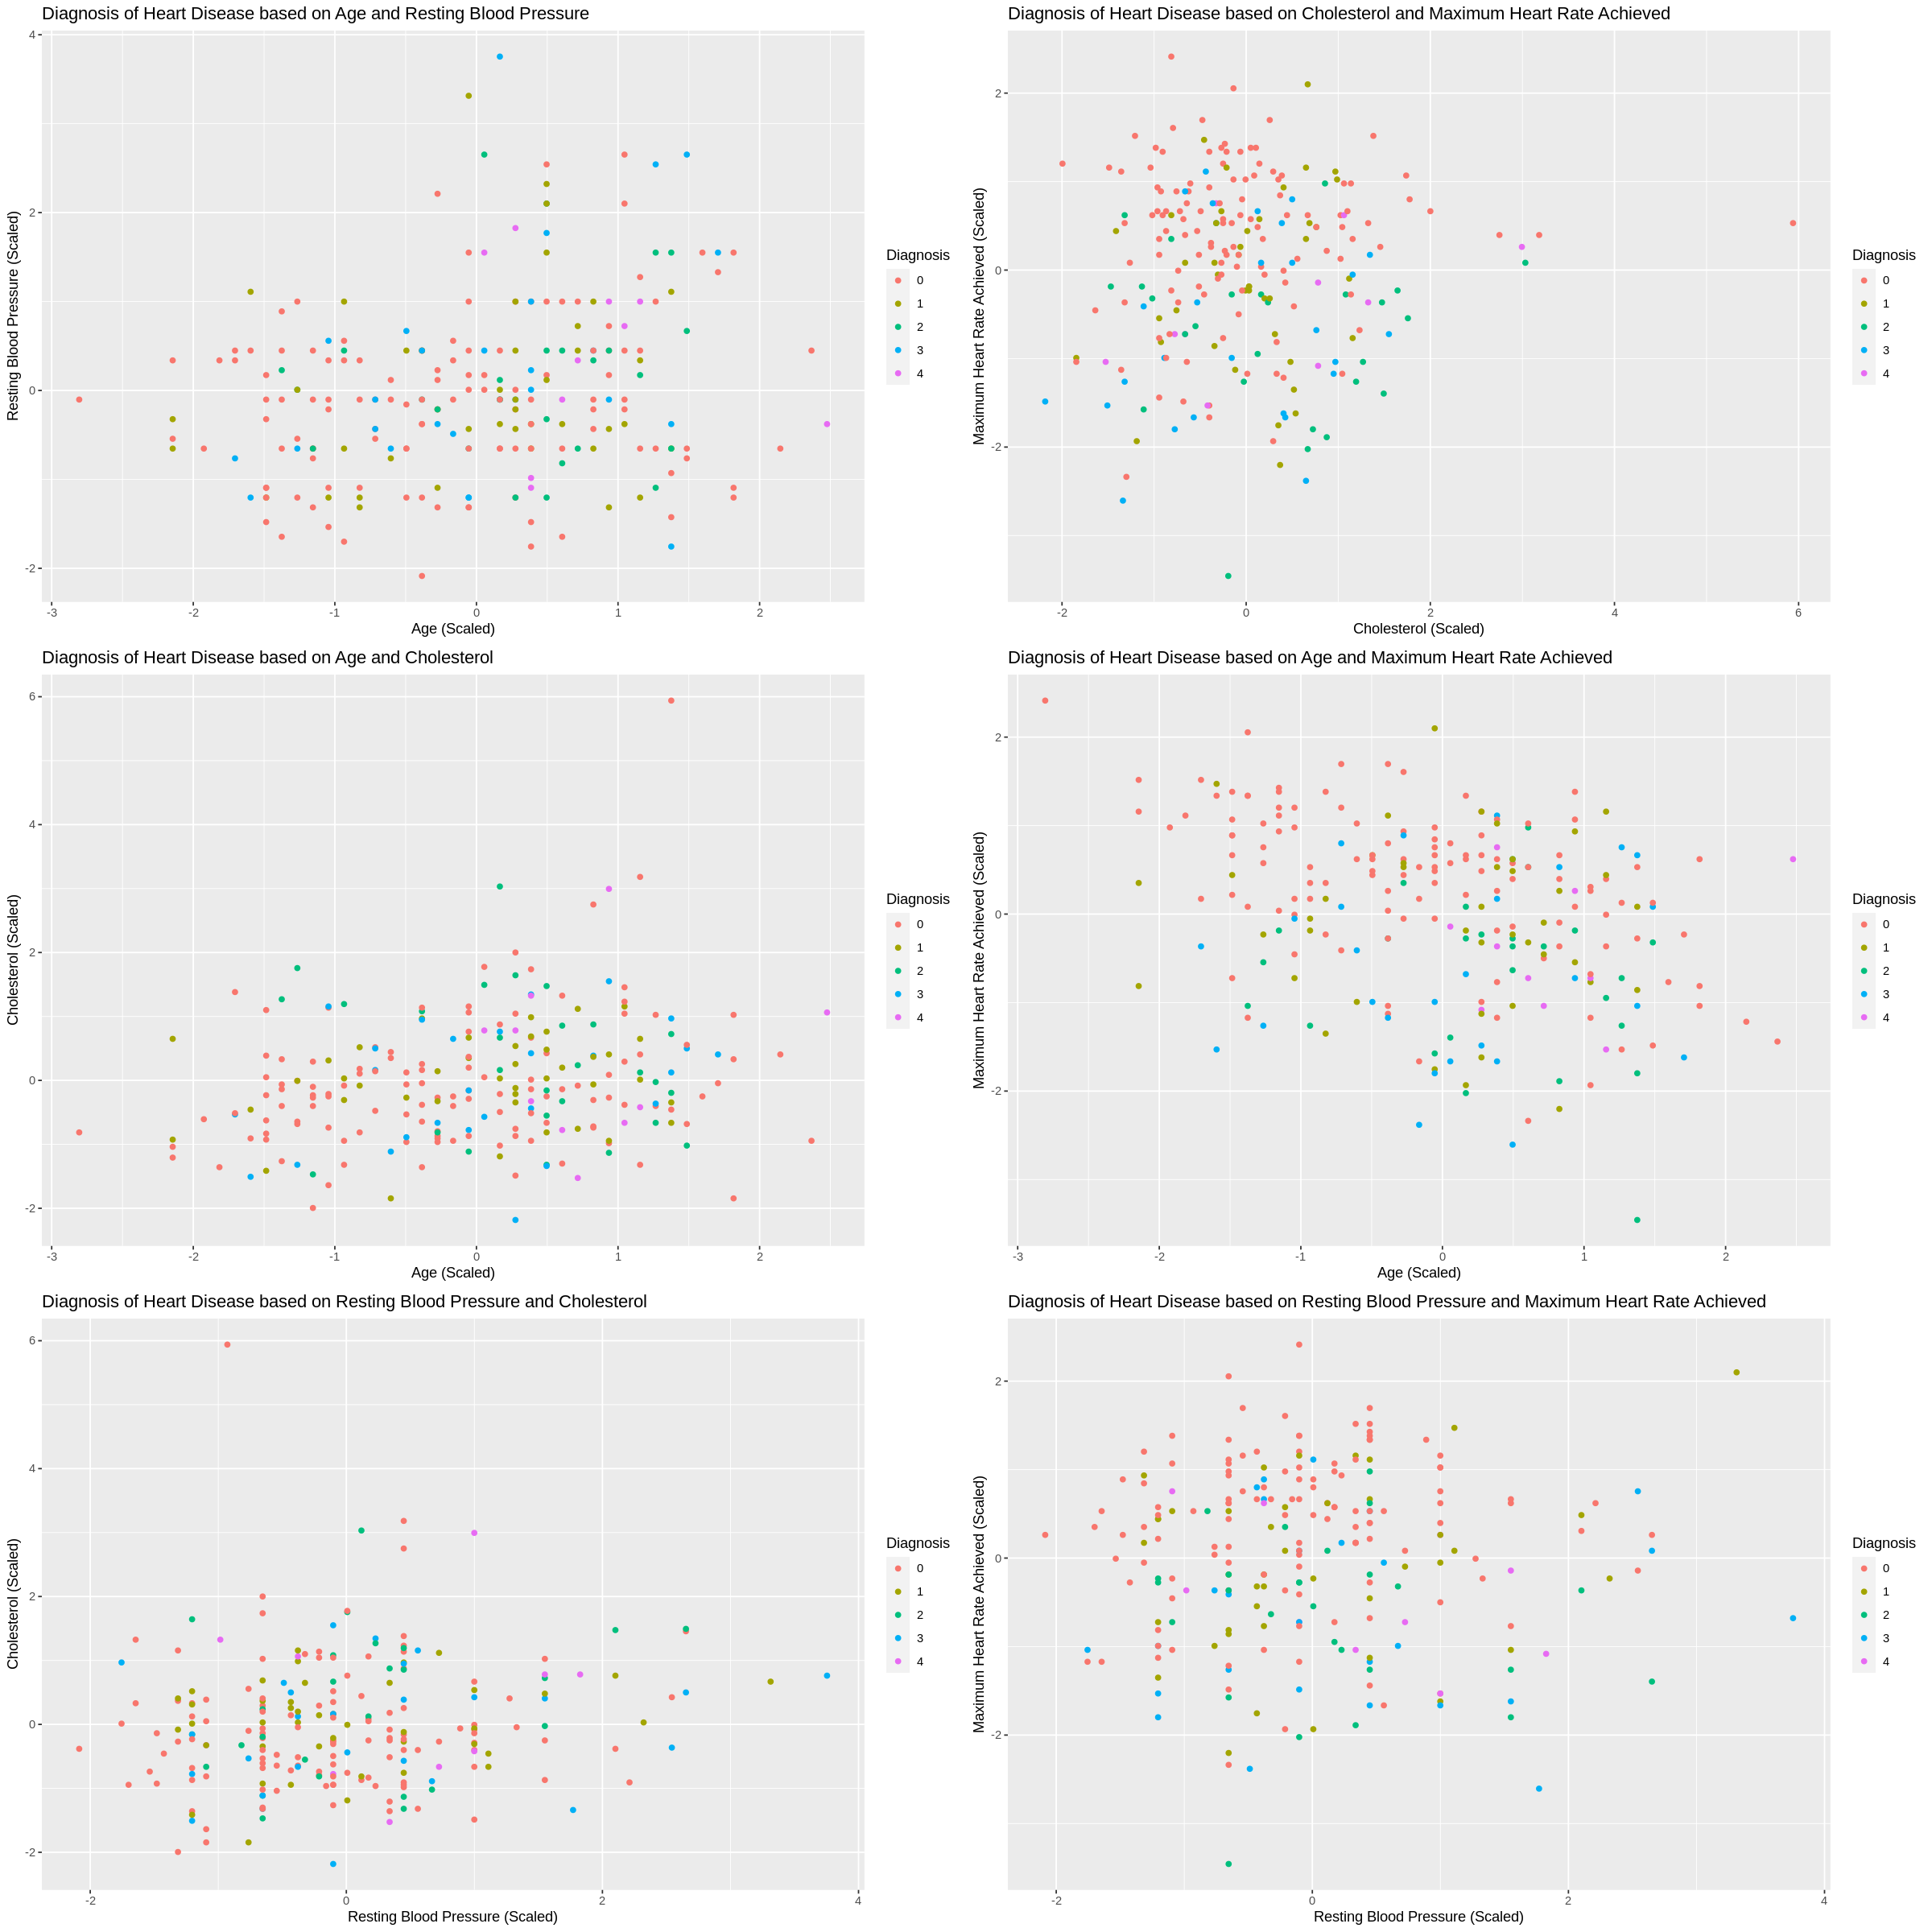

In [17]:
options(repr.plot.width = 20, repr.plot.height = 20)

cleveland_plot_1 <- training_scaled %>%
ggplot(aes(x=age, y=trestbps, colour=num)) +
geom_point()+
labs(x="Age (Scaled)", y="Resting Blood Pressure (Scaled)", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Age and Resting Blood Pressure") 

cleveland_plot_2 <- training_scaled %>%
ggplot(aes(x=chol, y=thalach, colour=num)) +
geom_point()+
labs(x="Cholesterol (Scaled)", y="Maximum Heart Rate Achieved (Scaled)", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Cholesterol and Maximum Heart Rate Achieved")

cleveland_plot_3 <- training_scaled %>%
ggplot(aes(x=age, y=chol, colour=num)) +
geom_point()+
labs(x="Age (Scaled)", y="Cholesterol (Scaled)", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Age and Cholesterol")

cleveland_plot_4 <- training_scaled %>%
ggplot(aes(x=age, y=thalach, colour=num)) +
geom_point()+
labs(x="Age (Scaled)", y="Maximum Heart Rate Achieved (Scaled)", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Age and Maximum Heart Rate Achieved")

cleveland_plot_5 <- training_scaled %>%
ggplot(aes(x=trestbps, y=chol, colour=num)) +
geom_point()+
labs(x="Resting Blood Pressure (Scaled)", y="Cholesterol (Scaled)", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Resting Blood Pressure and Cholesterol")

cleveland_plot_6 <- training_scaled %>%
ggplot(aes(x=trestbps, y=thalach, colour=num)) +
geom_point()+
labs(x="Resting Blood Pressure (Scaled)", y="Maximum Heart Rate Achieved (Scaled)", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Resting Blood Pressure and Maximum Heart Rate Achieved")

plot_grid(cleveland_plot_1, cleveland_plot_2, cleveland_plot_3, cleveland_plot_4, cleveland_plot_5, cleveland_plot_6, ncol = 2)
